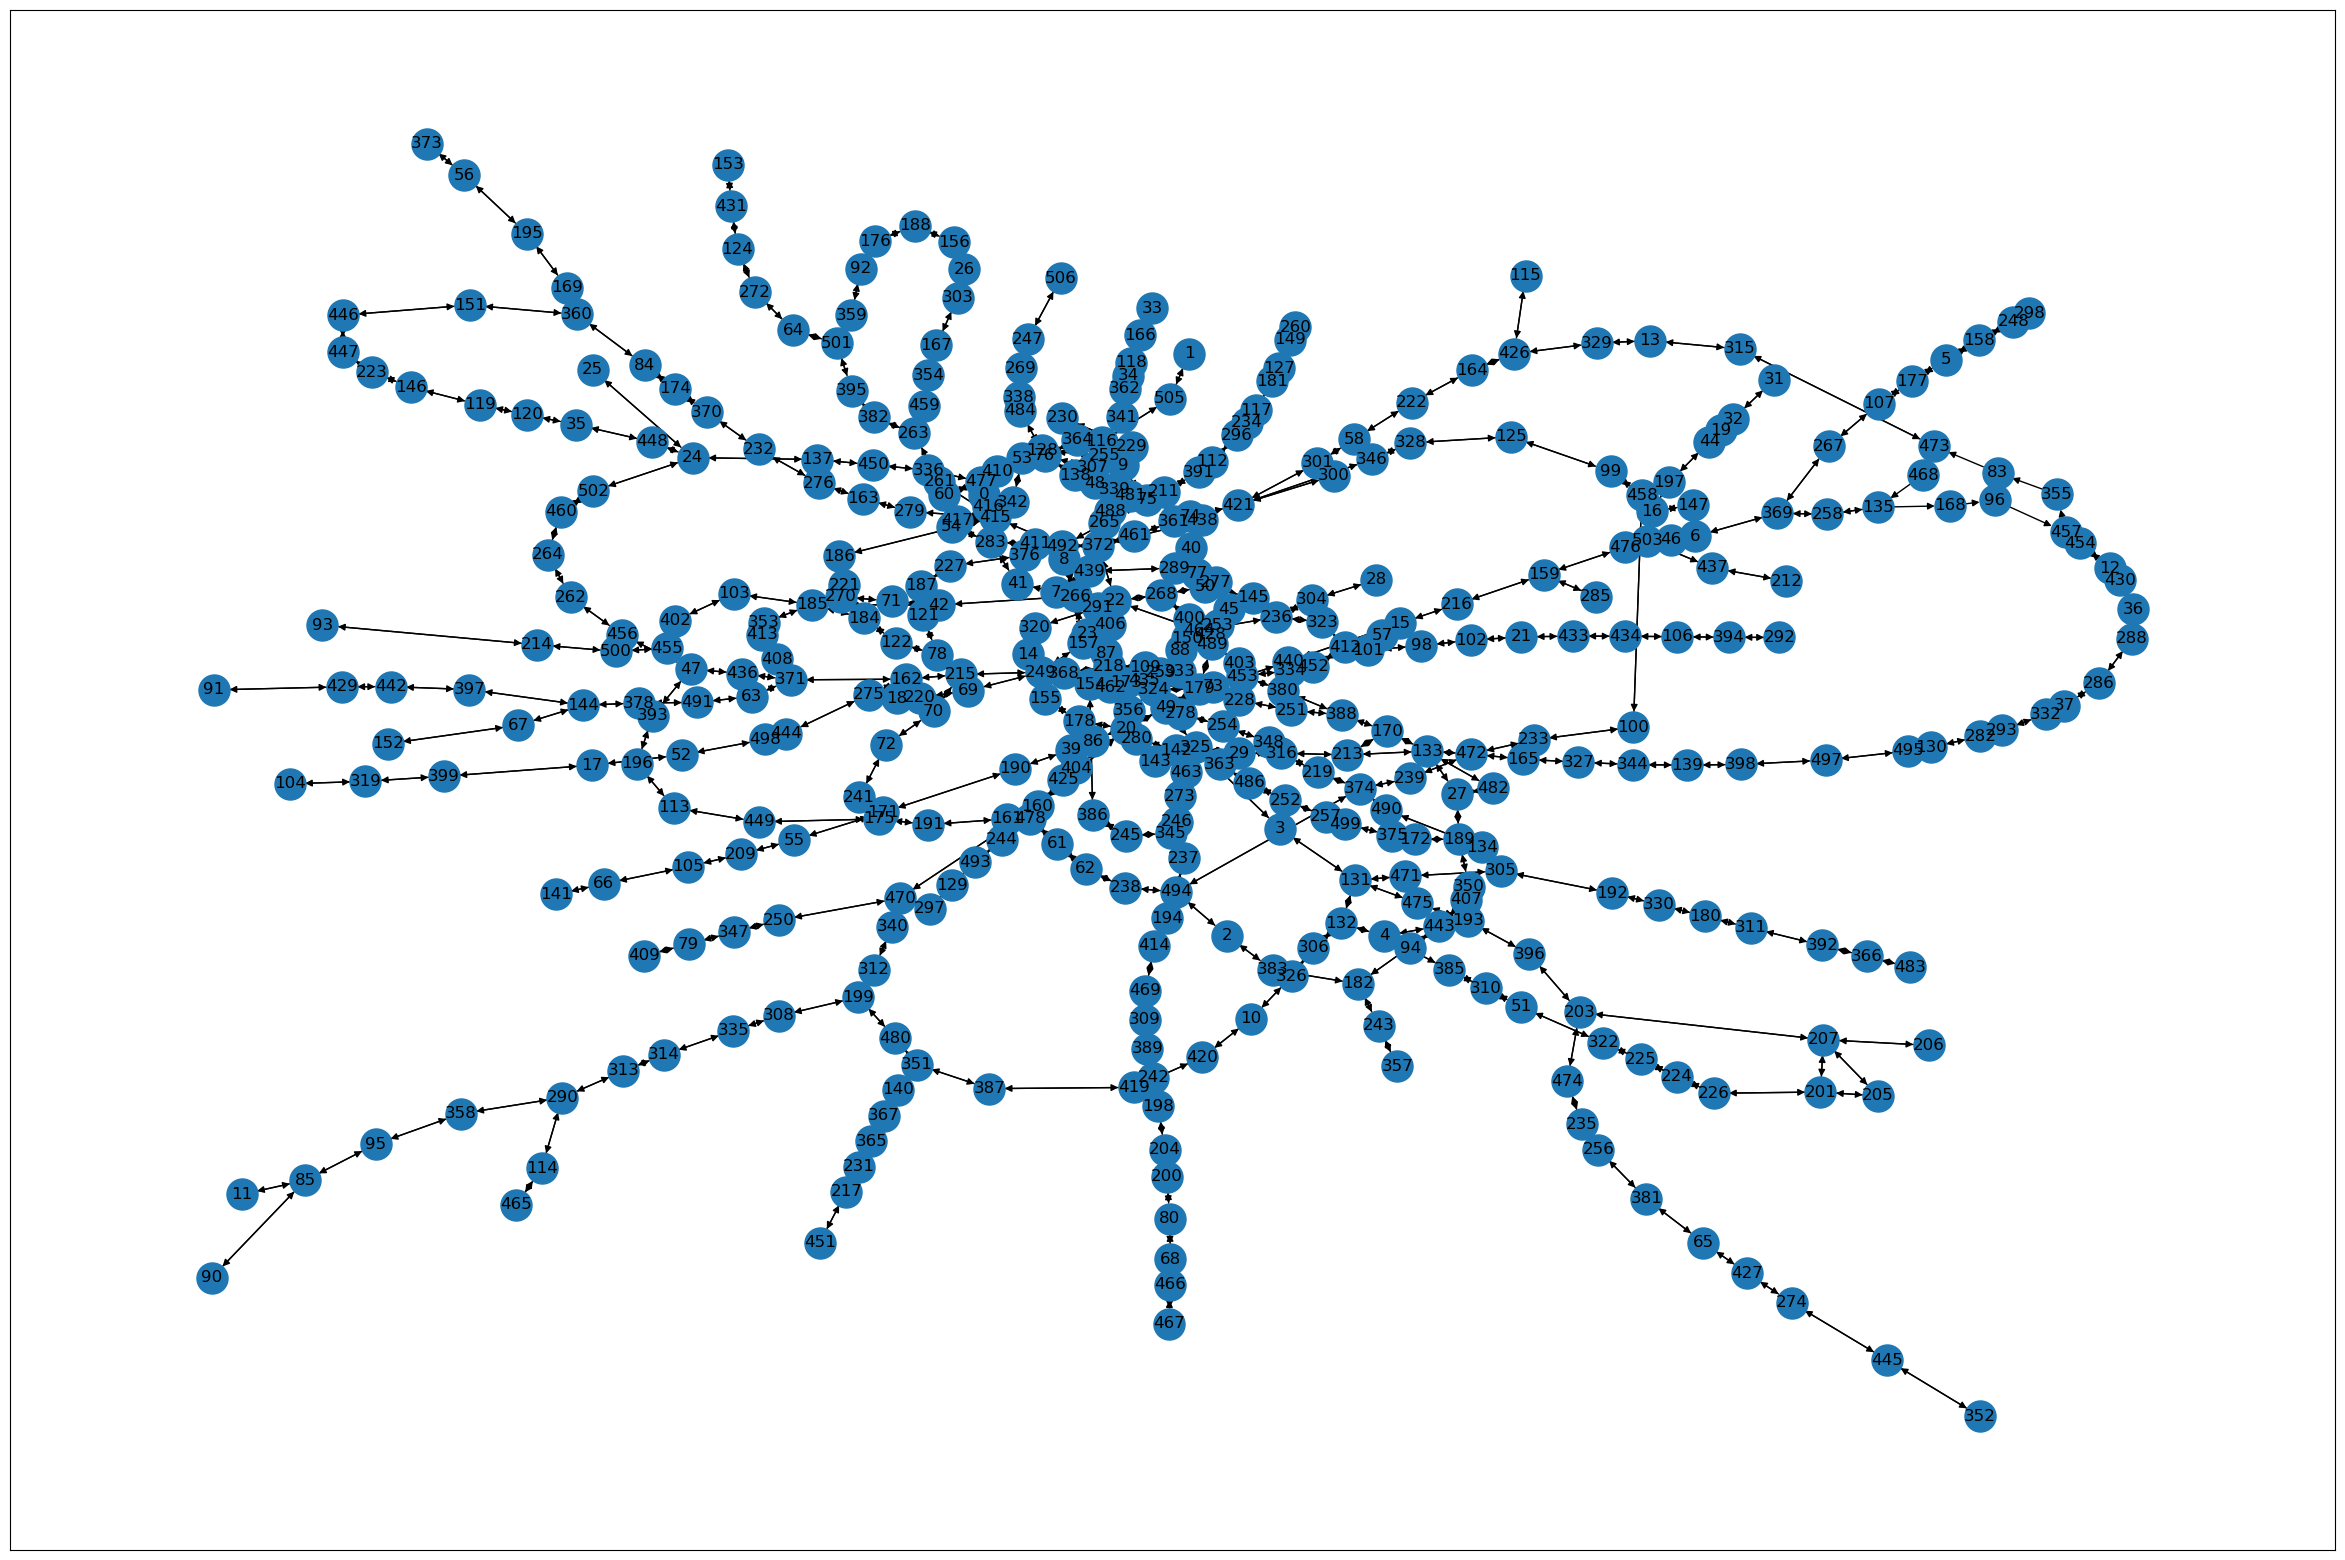

In [21]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os

stations_list = pd.read_excel("All Stations.xlsx")
index_to_station_name = {}
station_name_to_index = {}
for i,station in enumerate(stations_list['Station']):
    index_to_station_name[i] = station
    station_name_to_index[station] = i

df = pd.DataFrame()
for filename in os.listdir("Lines"):
    if filename.endswith('.xlsx'):
        file = os.path.join("Lines", filename)
        df_new = pd.read_excel(file)
        df = pd.concat([df, df_new], ignore_index=True)

G = nx.DiGraph()

for _, row in df.iterrows():
    start_index = station_name_to_index[row['Start']]
    end_index = station_name_to_index[row['End']]
    if row['Directed'] == 1:  # Directed edge
        G.add_edge(start_index, end_index, weight=row['Time'])
    else:  # Undirected edge
        G.add_edge(start_index, end_index, weight=row['Time'])
        G.add_edge(end_index, start_index, weight=row['Time'])  # Adding the reverse as well


pos = nx.kamada_kawai_layout(G)

# Get edge weights for visual representation
weights = [G[u][v]['weight'] for u, v in G.edges()]

fig = plt.figure(figsize=(30,20))
nx.draw_networkx(G,
                 pos=pos,
                 with_labels=True,
                 node_size=500,
                 font_size=12,
                 arrowstyle='-|>')

plt.show()